In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [92]:
df=pd.read_csv('data/travel_data.csv')

In [4]:
df.head(2)

,SEQ_NO,ALL_KWRD_RANK_CO,SRCHWRD_NM,UPPER_CTGRY_NM,LWPRT_CTGRY_NM,CNTT_NM,COUNTRY_NM,MOBILE_SCCNT_VALUE,PC_SCCNT_VALUE,SCCNT_SM_VALUE,SCCNT_DE
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701


In [93]:
df=df.rename(columns={'SEQ_NO':'일렬번호','ALL_KWRD_RANK_CO':'키워드 순위','SRCHWRD_NM':'검색어명','UPPER_CTGRY_NM':'카테고리(상)','LWPRT_CTGRY_NM':'카테고리(하)','CNTT_NM':'대륙','COUNTRY_NM':'국가','MOBILE_SCCNT_VALUE':'모바일 검색량','PC_SCCNT_VALUE':'PC 검색량','SCCNT_SM_VALUE':'총 검색량','SCCNT_DE':'검색일자'})

In [6]:
df.head(2)

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,20190701
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,20190701


In [94]:
df['검색일자']=pd.to_datetime(df['검색일자'], format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [8]:
df.head(2)

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,2019-07-01
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,2019-07-01


In [32]:
df['국가'].nunique()

49

In [158]:
df['총 검색량']==0

0        False
1        False
2        False
3        False
4        False
         ...  
23853    False
23854    False
23855    False
23856    False
23857    False
Name: 총 검색량, Length: 23858, dtype: bool

In [159]:
df[df['총 검색량'] == 0]

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
23518,24136,1,괌여행,여행,해외여행,오세아니아,미국,0,0,0,2025-01
23519,24137,2,칸여행,여행,해외여행,유럽,프랑스,0,0,0,2025-01
23520,24138,3,계림여행,여행,해외여행,아시아,중국,0,0,0,2025-01
23521,24139,4,고아여행,여행,해외여행,아시아,인도,0,0,0,2025-01
23522,24140,5,곤명여행,여행,해외여행,아시아,중국,0,0,0,2025-01
23523,24141,6,교토여행,여행,해외여행,아시아,일본,0,0,0,2025-01
23524,24142,7,규슈여행,여행,해외여행,아시아,일본,0,0,0,2025-01
23525,24143,8,냐짱여행,여행,해외여행,아시아,베트남,0,0,0,2025-01
23526,24144,9,네팔여행,여행,해외여행,아시아,네팔,0,0,0,2025-01
23527,24145,10,뉴욕여행,여행,해외여행,북아메리카,미국,0,0,0,2025-01


In [160]:
df['키워드 순위'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [161]:
df['검색일자'].unique()

array(['2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
       '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
       '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
       '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12',
       '2025-01', '2025-02'], dtype=object)

In [162]:
df.loc[:,['키워드 순위','검색어명']]

,키워드 순위,검색어명
0,1,일본여행
1,2,대만여행
2,3,후쿠오카여행
3,4,블라디보스톡여행
4,5,오사카여행
...,...,...
23853,6,싱가포르여행
23854,7,오사카여행
23855,8,도쿄여행
23856,9,발리여행


In [163]:

# 검색일자와 검색어명으로 그룹화하고 검색량 합계 계산
grouped = df.groupby(['검색일자', '검색어명'])['총 검색량'].sum().reset_index()

# 각 검색일자에서 검색량이 가장 높은 검색어 선택
result = grouped.loc[grouped.groupby('검색일자')['총 검색량'].idxmax()]

# 결과 출력 (검색일자 순으로 정렬)
result=result.sort_values('검색일자')

In [164]:
import matplotlib.pyplot as plt
import seaborn as sb

In [165]:
result

,검색일자,검색어명,총 검색량
13,2019-07,일본여행,522855
30,2019-08,일본여행,246879
51,2019-09,피지여행,311329
55,2019-10,대만여행,247156
71,2019-11,대만여행,290414
...,...,...,...
1131,2024-10,대만여행,486287
1153,2024-11,일본여행,312265
1173,2024-12,일본여행,401781
1197,2025-01,일본여행,255998


In [166]:
df.groupby('검색일자')['총 검색량'].sum()

검색일자
2019-07    1768685
2019-08    1334747
2019-09    1333092
2019-10    1149806
2019-11    1286792
            ...   
2024-10    2983602
2024-11    1848883
2024-12    2193269
2025-01    1417308
2025-02     512940
Name: 총 검색량, Length: 68, dtype: int64

In [167]:
result = df.groupby('검색일자')['총 검색량'].sum().reset_index()
result['연도'] = result['검색일자'].astype(str).str[:4]
result_2024 = result[result['연도'] == '2024']
result_sorted = result_2024.sort_values('총 검색량', ascending=False)

In [168]:
result_sorted

,검색일자,총 검색량,연도
54,2024-01,3955164,2024
60,2024-07,3247518,2024
61,2024-08,3086194,2024
56,2024-03,3061126,2024
63,2024-10,2983602,2024
55,2024-02,2971390,2024
58,2024-05,2969031,2024
59,2024-06,2855155,2024
62,2024-09,2672629,2024
57,2024-04,2623602,2024


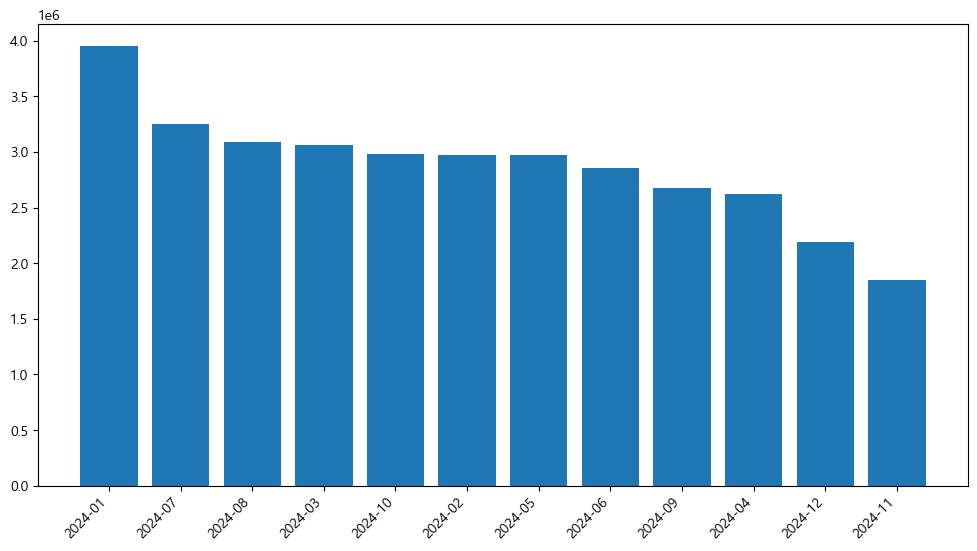

In [169]:
plt.figure(figsize=(12, 6))
plt.bar(result_sorted['검색일자'].astype(str), result_sorted['총 검색량'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [208]:
df['연도']=df['검색일자'].astype(str).str[:4]

In [171]:
yearly_totals = df.groupby('연도')['총 검색량'].sum().reset_index()
yearly_totals = yearly_totals.sort_values('연도')

In [172]:
yearly_totals=yearly_totals[yearly_totals['연도']<='2024']

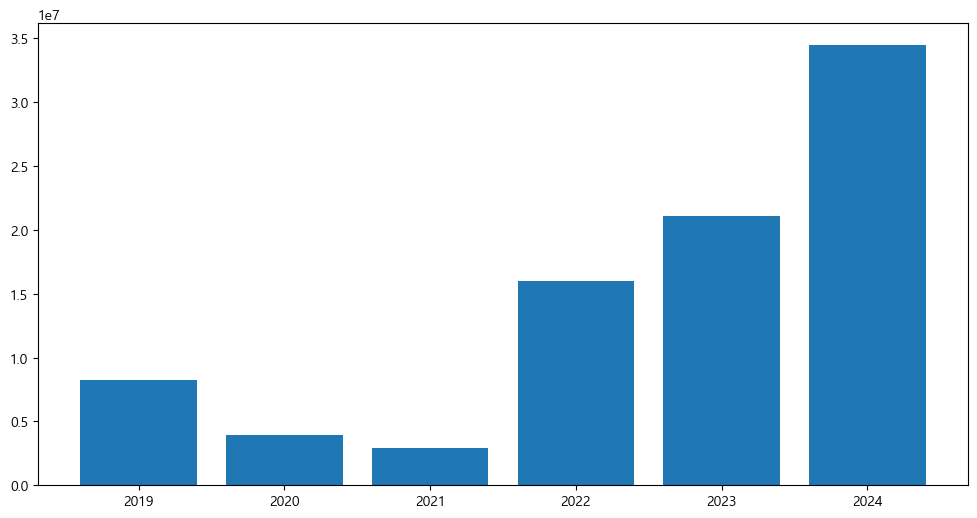

In [174]:
plt.subplots(figsize=(12, 6))
plt.bar(yearly_totals['연도'], yearly_totals['총 검색량'])
plt.show()


In [175]:
result=df.groupby('검색어명')['총 검색량'].sum().reset_index()

In [176]:
result

,검색어명,총 검색량
0,계림여행,0
1,고아여행,0
2,곤명여행,0
3,괌여행,2017345
4,광저우여행,2533
...,...,...
91,하와이여행,735309
92,하코네여행,4140
93,호주여행,6885
94,홍콩여행,3967102


In [177]:
result=result.sort_values('총 검색량',ascending=False).head(10).reset_index(drop='index')

In [178]:
result

,검색어명,총 검색량
0,일본여행,18981054
1,대만여행,10857674
2,베트남여행,8560627
3,후쿠오카여행,7245008
4,싱가포르여행,7144057
5,오사카여행,6016865
6,태국여행,5282189
7,도쿄여행,4791093
8,홍콩여행,3967102
9,발리여행,2228968


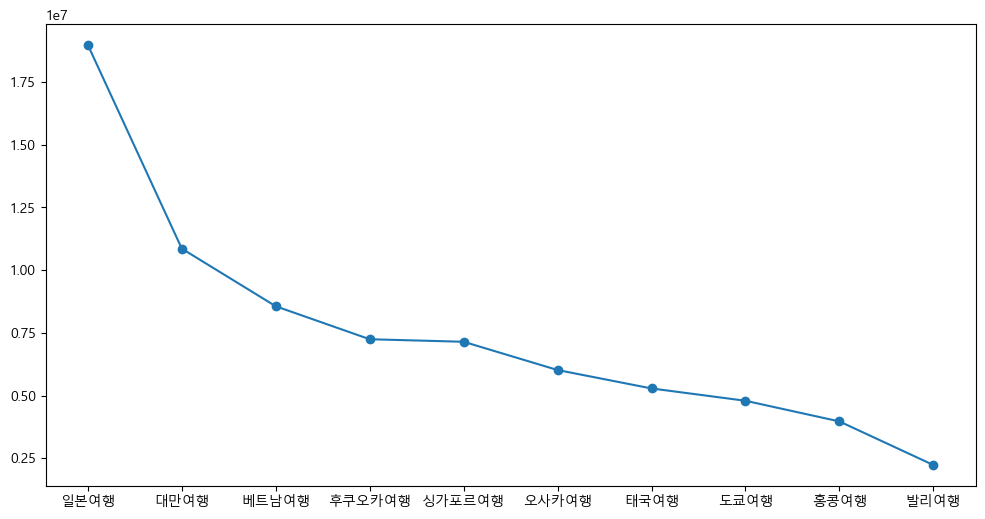

In [179]:
plt.subplots(figsize=(12, 6))
plt.plot(result['검색어명'], result['총 검색량'], marker='o')
plt.show()

In [180]:
df.head(2)

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자,연도
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,2019-07,2019
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,2019-07,2019


In [181]:
result=df.groupby('검색어명')[['모바일 검색량','PC 검색량','총 검색량']].sum().reset_index()

In [182]:
result=result.sort_values(['총 검색량'],ascending=False).head(10).reset_index(drop='index')

In [183]:
result=result.head(10)

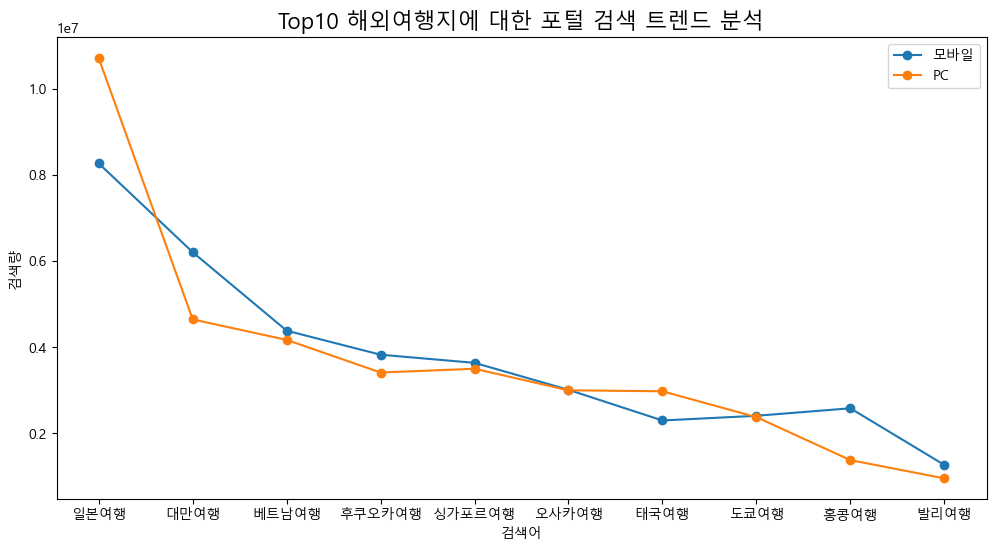

In [184]:
plt.subplots(figsize=(12, 6))
plt.plot(result['검색어명'],result['모바일 검색량'],label='모바일',marker='o')
plt.plot(result['검색어명'],result['PC 검색량'],label='PC',marker='o')
plt.title('Top10 해외여행지에 대한 포털 검색 트렌드 분석',fontsize=16)
plt.xlabel('검색어')
plt.ylabel('검색량')
plt.legend()
plt.show()

In [209]:
df['검색어명'] = df['검색어명'].str[:-2]

In [210]:
df=df.groupby(['연도','검색어명'])[['총 검색량']].sum().reset_index()

In [211]:
df=df[df['연도']<'2025']

In [212]:
df

,연도,검색어명,총 검색량
0,2019,괌,432579
1,2019,광저우,2533
2,2019,뉴질랜드,11538
3,2019,다낭,358291
4,2019,대만,1506493
...,...,...,...
241,2024,태국,1488532
242,2024,포르투갈,29112
243,2024,푸꾸옥,56187
244,2024,홍콩,2528981


In [213]:
df=df.loc[df['검색어명'].isin(df['검색어명'].value_counts()[df['검색어명'].value_counts()>4].index)]

In [214]:
df

,연도,검색어명,총 검색량
0,2019,괌,432579
3,2019,다낭,358291
4,2019,대만,1506493
5,2019,두바이,16689
6,2019,라오스,19337
...,...,...,...
236,2024,조지아,14076
237,2024,중국,32842
241,2024,태국,1488532
244,2024,홍콩,2528981


In [215]:
y=df['검색어명']
X=df.drop(columns='검색어명')

In [216]:
numerical=['연도','총 검색량']
categorical=['검색어명']

In [217]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer()

In [218]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder()

In [219]:
from sklearn.compose import ColumnTransformer
onehot_columns=['검색어명']
numeric_columns=['연도','총 검색량']

In [220]:
preprocessor=ColumnTransformer([
    ('num',imputer,numeric_columns),
    ('onehot',onehot_encoder,onehot_columns)
])

In [221]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(random_state=47)

In [222]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline(steps=[('preprocessor',preprocessor),('modeling',regressor)])

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=47)

In [228]:
y_train

60     싱가포르
30       홍콩
84       홍콩
211      태국
184      대만
       ... 
164    이탈리아
12      베트남
160    싱가포르
10       몽골
11       발리
Name: 검색어명, Length: 93, dtype: object

In [227]:
pipeline.fit(X_train,y_train)

ValueError: A given column is not a column of the dataframe

In [39]:
df

,일렬번호,키워드 순위,검색어명,카테고리(상),카테고리(하),대륙,국가,모바일 검색량,PC 검색량,총 검색량,검색일자
0,15744,1,일본여행,여행,해외여행,아시아,일본,5294,1850,7144,2019-07-01
1,15745,2,대만여행,여행,해외여행,아시아,대만,4960,842,5802,2019-07-01
2,15746,3,후쿠오카여행,여행,해외여행,아시아,일본,5103,499,5602,2019-07-01
3,15747,4,블라디보스톡여행,여행,해외여행,아시아,러시아,4406,743,5149,2019-07-01
4,15748,5,오사카여행,여행,해외여행,아시아,일본,3761,1288,5049,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...
23853,24471,6,싱가포르여행,여행,해외여행,아시아,싱가포르,3018,801,3819,2025-02-11
23854,24472,7,오사카여행,여행,해외여행,아시아,일본,2673,982,3655,2025-02-11
23855,24473,8,도쿄여행,여행,해외여행,아시아,일본,2210,908,3118,2025-02-11
23856,24474,9,발리여행,여행,해외여행,아시아,인도네시아,2077,626,2703,2025-02-11


In [91]:
df

In [ ]:
# prophet
# 검색일자와 총검색량을 가지고 예측

In [98]:
from prophet import Prophet

In [99]:
import os
os.environ['R_STAN_BACKEND'] = 'CMDSTANR'

In [117]:
model=Prophet()

In [118]:
df_new=df.groupby(['검색일자'])[['총 검색량']].sum().reset_index()

In [119]:
df_new

,검색일자,총 검색량
0,2019-07-01,47702
1,2019-07-02,50193
2,2019-07-03,48087
3,2019-07-04,59763
4,2019-07-05,57818
...,...,...
2048,2025-02-07,39780
2049,2025-02-08,44488
2050,2025-02-09,50660
2051,2025-02-10,48965


In [120]:
df_new.columns=['ds','y']

In [121]:
df_new

,ds,y
0,2019-07-01,47702
1,2019-07-02,50193
2,2019-07-03,48087
3,2019-07-04,59763
4,2019-07-05,57818
...,...,...
2048,2025-02-07,39780
2049,2025-02-08,44488
2050,2025-02-09,50660
2051,2025-02-10,48965


In [122]:
model.fit(df_new)

17:46:56 - cmdstanpy - INFO - Chain [1] start processing
17:46:57 - cmdstanpy - INFO - Chain [1] done processing


In [139]:
future = model.make_future_dataframe(periods=100)  # 30일 후까지 예측

In [ ]:
future

In [141]:
forecaster=model.predict(future)

In [ ]:
forecaster

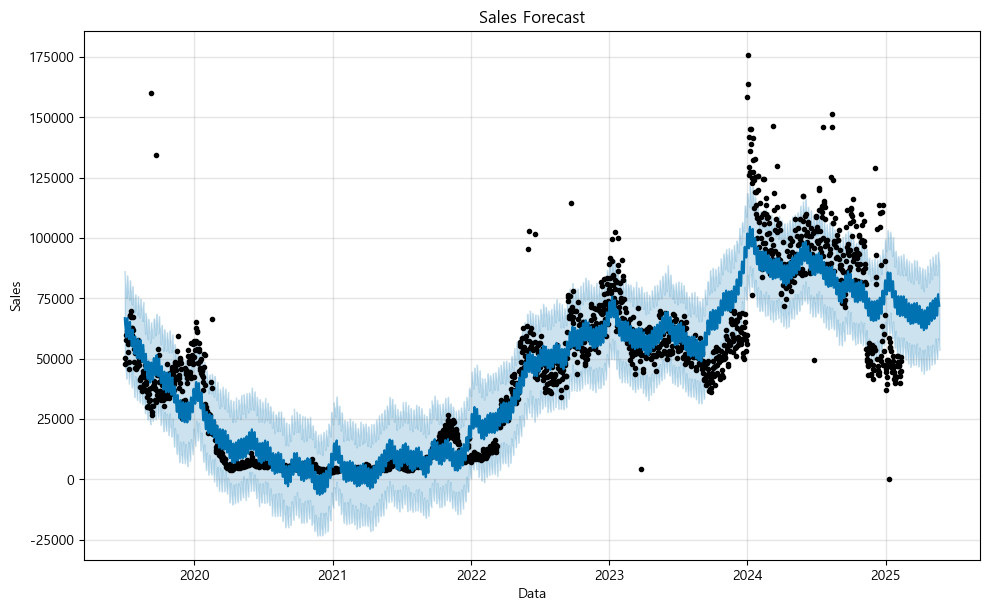

In [151]:
model.plot(forecaster)
plt.title('Sales Forecast')
plt.xlabel('Data')
plt.ylabel('Sales')
plt.show() 

In [129]:
import matplotlib.pyplot as plt

In [114]:
forecaster.set_index('ds').loc['2025-02-06','yhat']

69961.95722202728

In [ ]:
# 년도로 매년 얼마정도 여행에 관심을 두는지 확인
# 주로 무슨 요일에 여행 검색을 많이 하는지 확인

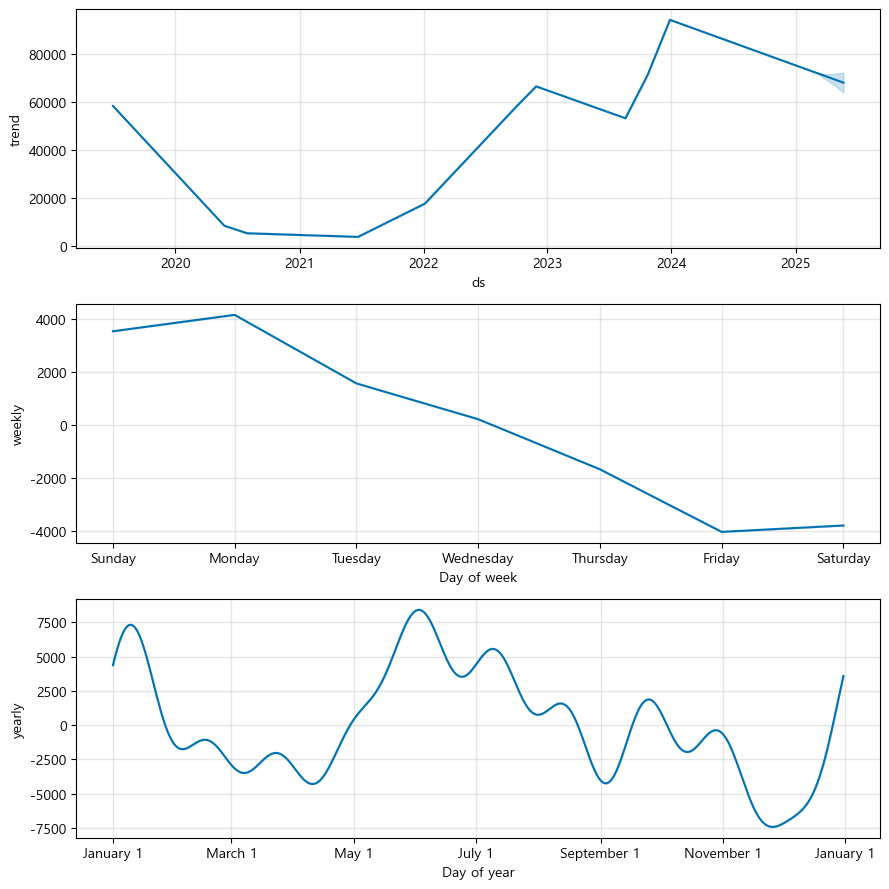

In [148]:
fig=model.plot_components(forecaster)
plt.show()

In [150]:
fig.write_html('prophet_forecast.html')

AttributeError: 'Figure' object has no attribute 'write_html'